# AdaBoost

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Archive/Machine Learning/Dataset/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

<Axes: xlabel='class', ylabel='count'>

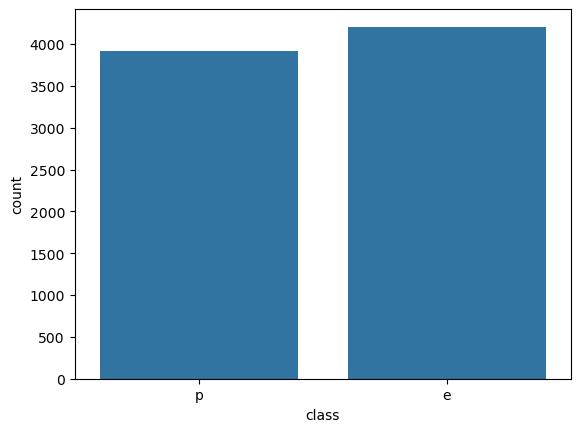

In [5]:
sns.countplot(data=df,x='class')

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


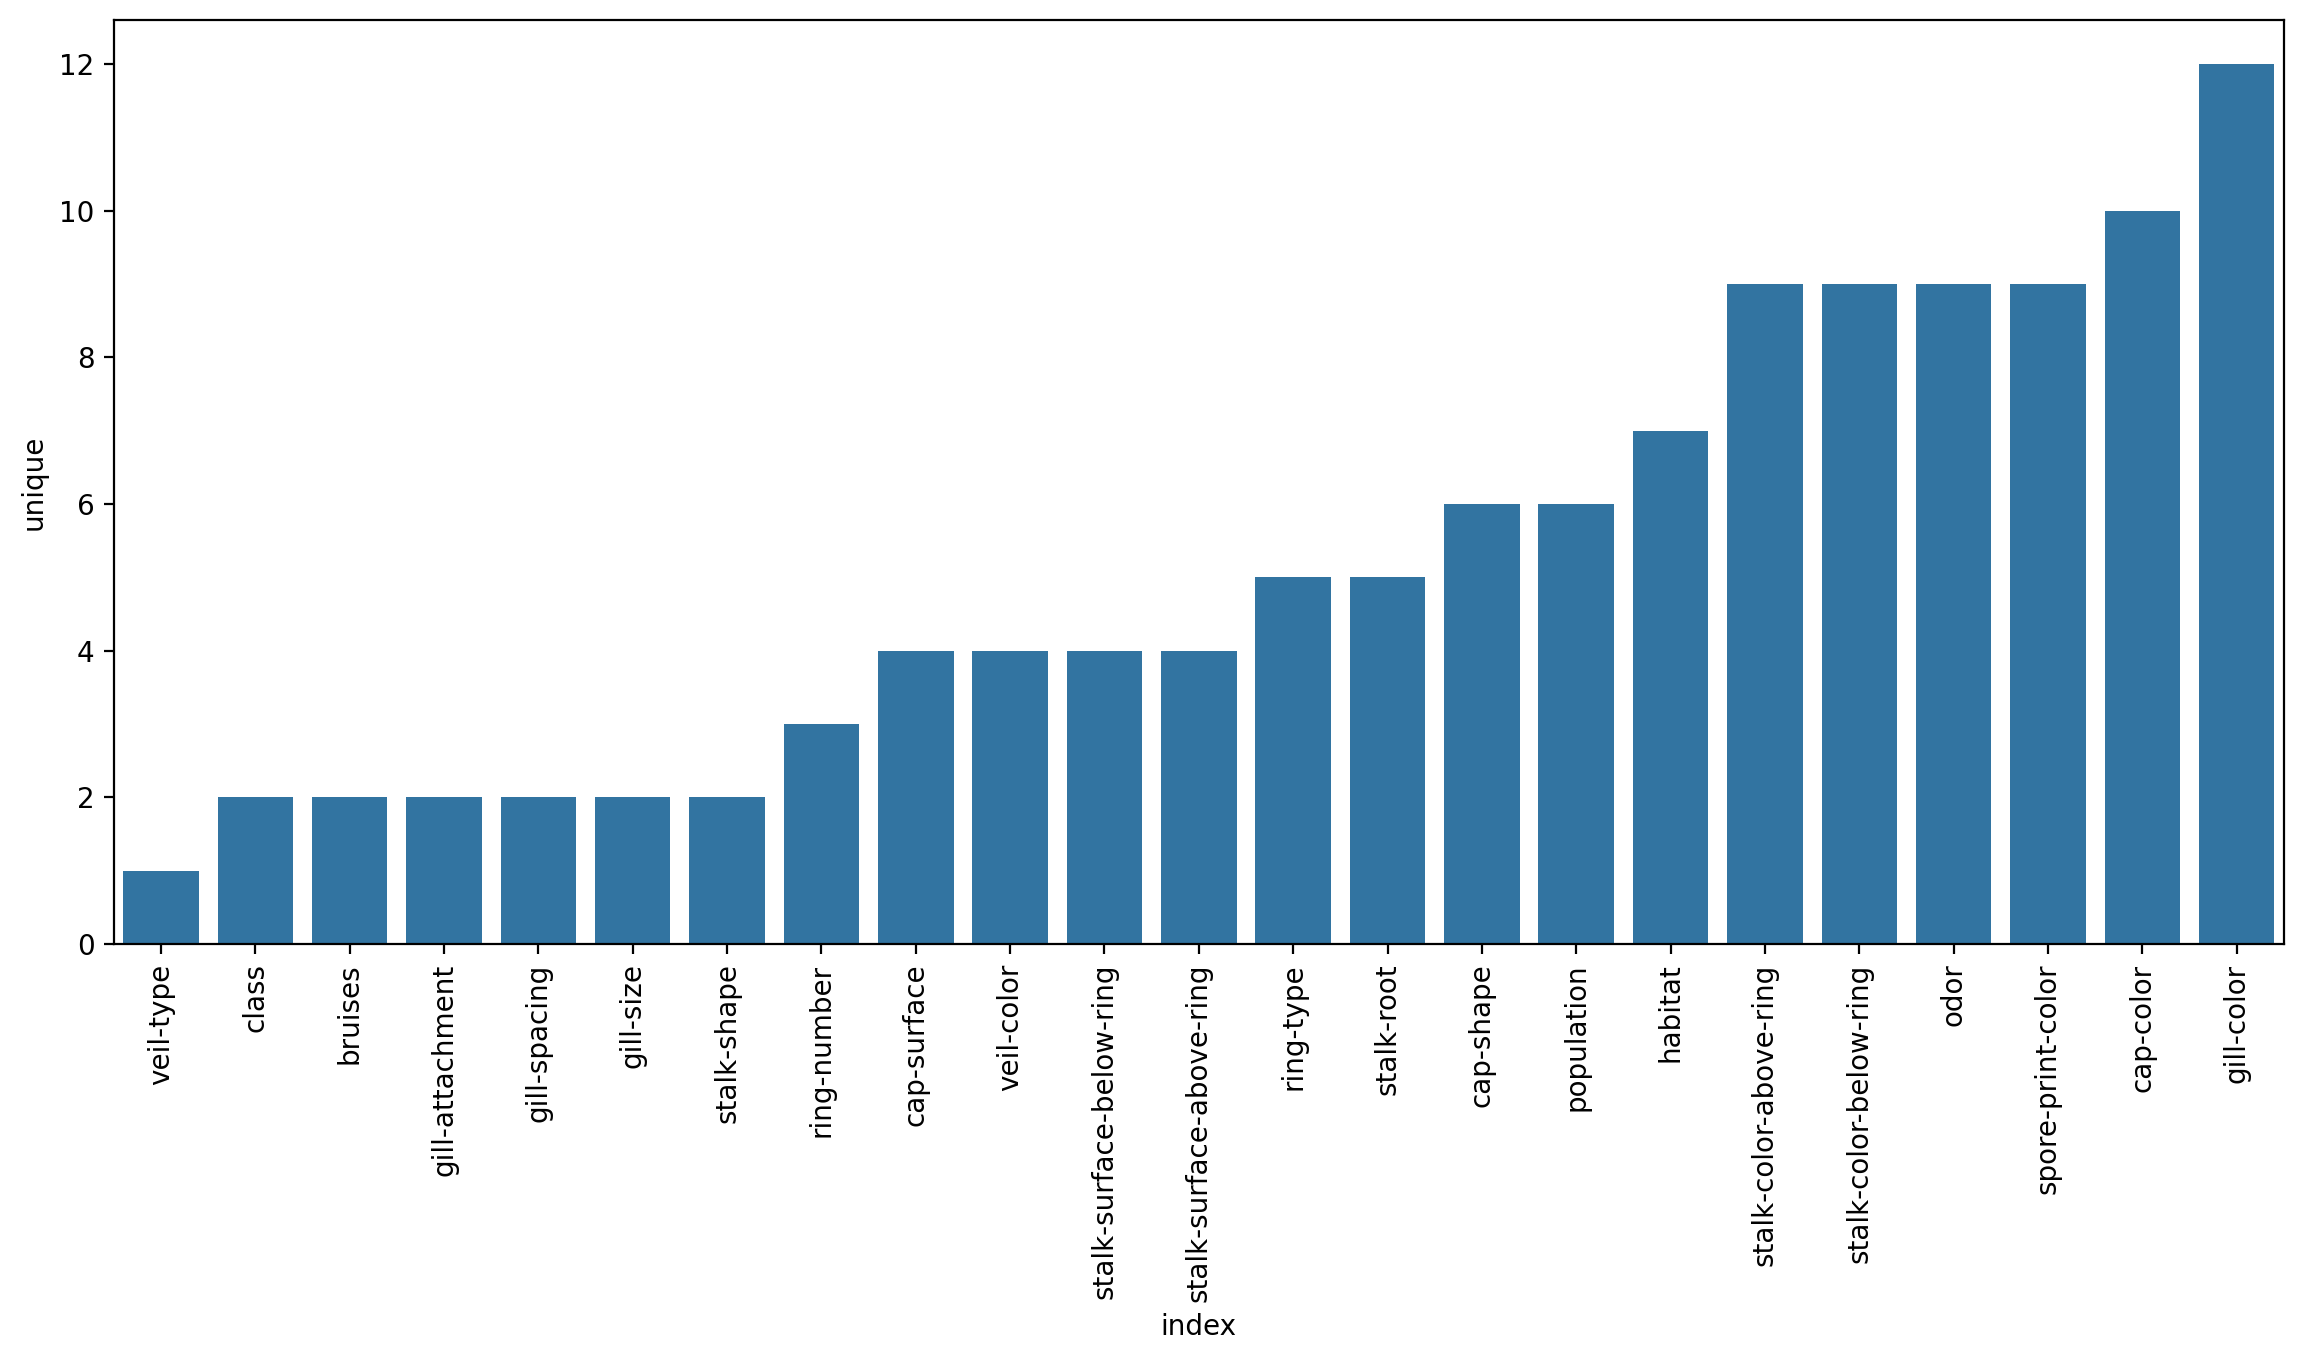

In [8]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

## Train Test Split

In [10]:
X = df.drop('class', axis=1)

In [11]:
X = pd.get_dummies(X,drop_first=True)

In [12]:
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Modeling

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
model = AdaBoostClassifier(n_estimators=4, algorithm='SAMME')

In [18]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |
 |  An AdaBoost classifier.
 |
 |  An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |
 |  This class implements the algorithm based on [2]_.
 |
 |  Read more in the :ref:`User Guide <adaboost>`.
 |
 |  .. versionadded:: 0.14
 |
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for 

In [35]:
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=4)

## Evaluation

In [36]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [37]:
predictions = model.predict(X_test)

In [38]:
predictions

array(['p', 'e', 'p', ..., 'e', 'e', 'p'], dtype=object)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.92      0.98      0.95       851
           p       0.98      0.91      0.94       774

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [40]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1535812 ,
       0.        , 0.        , 0.35202066, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
model.feature_importances_.argmax()

22

In [43]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

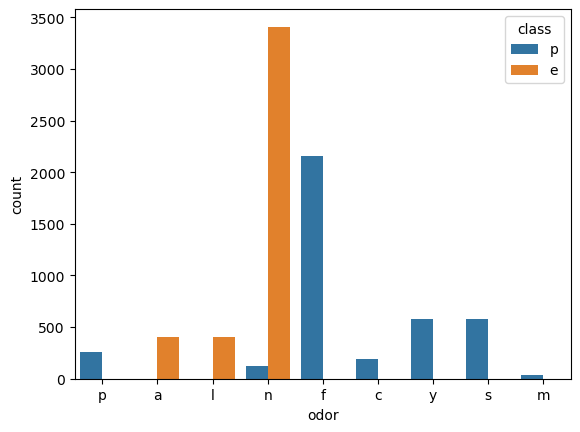

In [44]:
sns.countplot(data=df,x='odor',hue='class')

# Analyzing performance as more weak learners are added

In [45]:
len(X.columns)

95

In [47]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n, algorithm='SAMME')
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

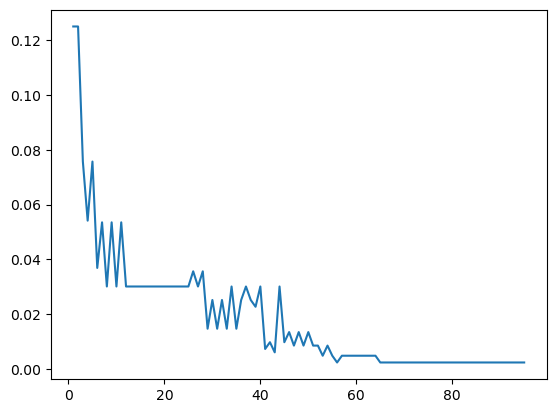

In [48]:
plt.plot(range(1,96),error_rates)

In [49]:
model

AdaBoostClassifier(algorithm='SAMME', n_estimators=95)

In [50]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08473717, 0.14993783,
       0.03444511, 0.        , 0.06363419, 0.08159963, 0.        ,
       0.        , 0.        , 0.0147193 , 0.0577315 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02247543, 0.        , 0.02179053, 0.        , 0.01221006,
       0.03889014, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03729757, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02794466, 0.        , 0.     

In [51]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [52]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [54]:
imp_feats = feats[feats['Importance']>0]

In [55]:
imp_feats

,Importance
odor_c,0.084737
odor_f,0.149938
odor_l,0.034445
odor_n,0.063634
odor_p,0.081600
gill-spacing_w,0.014719
gill-size_n,0.057732
stalk-shape_t,0.022475
stalk-root_c,0.021791
stalk-root_r,0.012210


In [56]:
imp_feats = imp_feats.sort_values("Importance",ascending=False)
imp_feats

,Importance
spore-print-color_r,0.153688
odor_f,0.149938
odor_c,0.084737
odor_p,0.081600
odor_n,0.063634
gill-size_n,0.057732
stalk-surface-above-ring_k,0.038890
stalk-color-below-ring_n,0.037298
ring-type_p,0.036482
population_c,0.036350


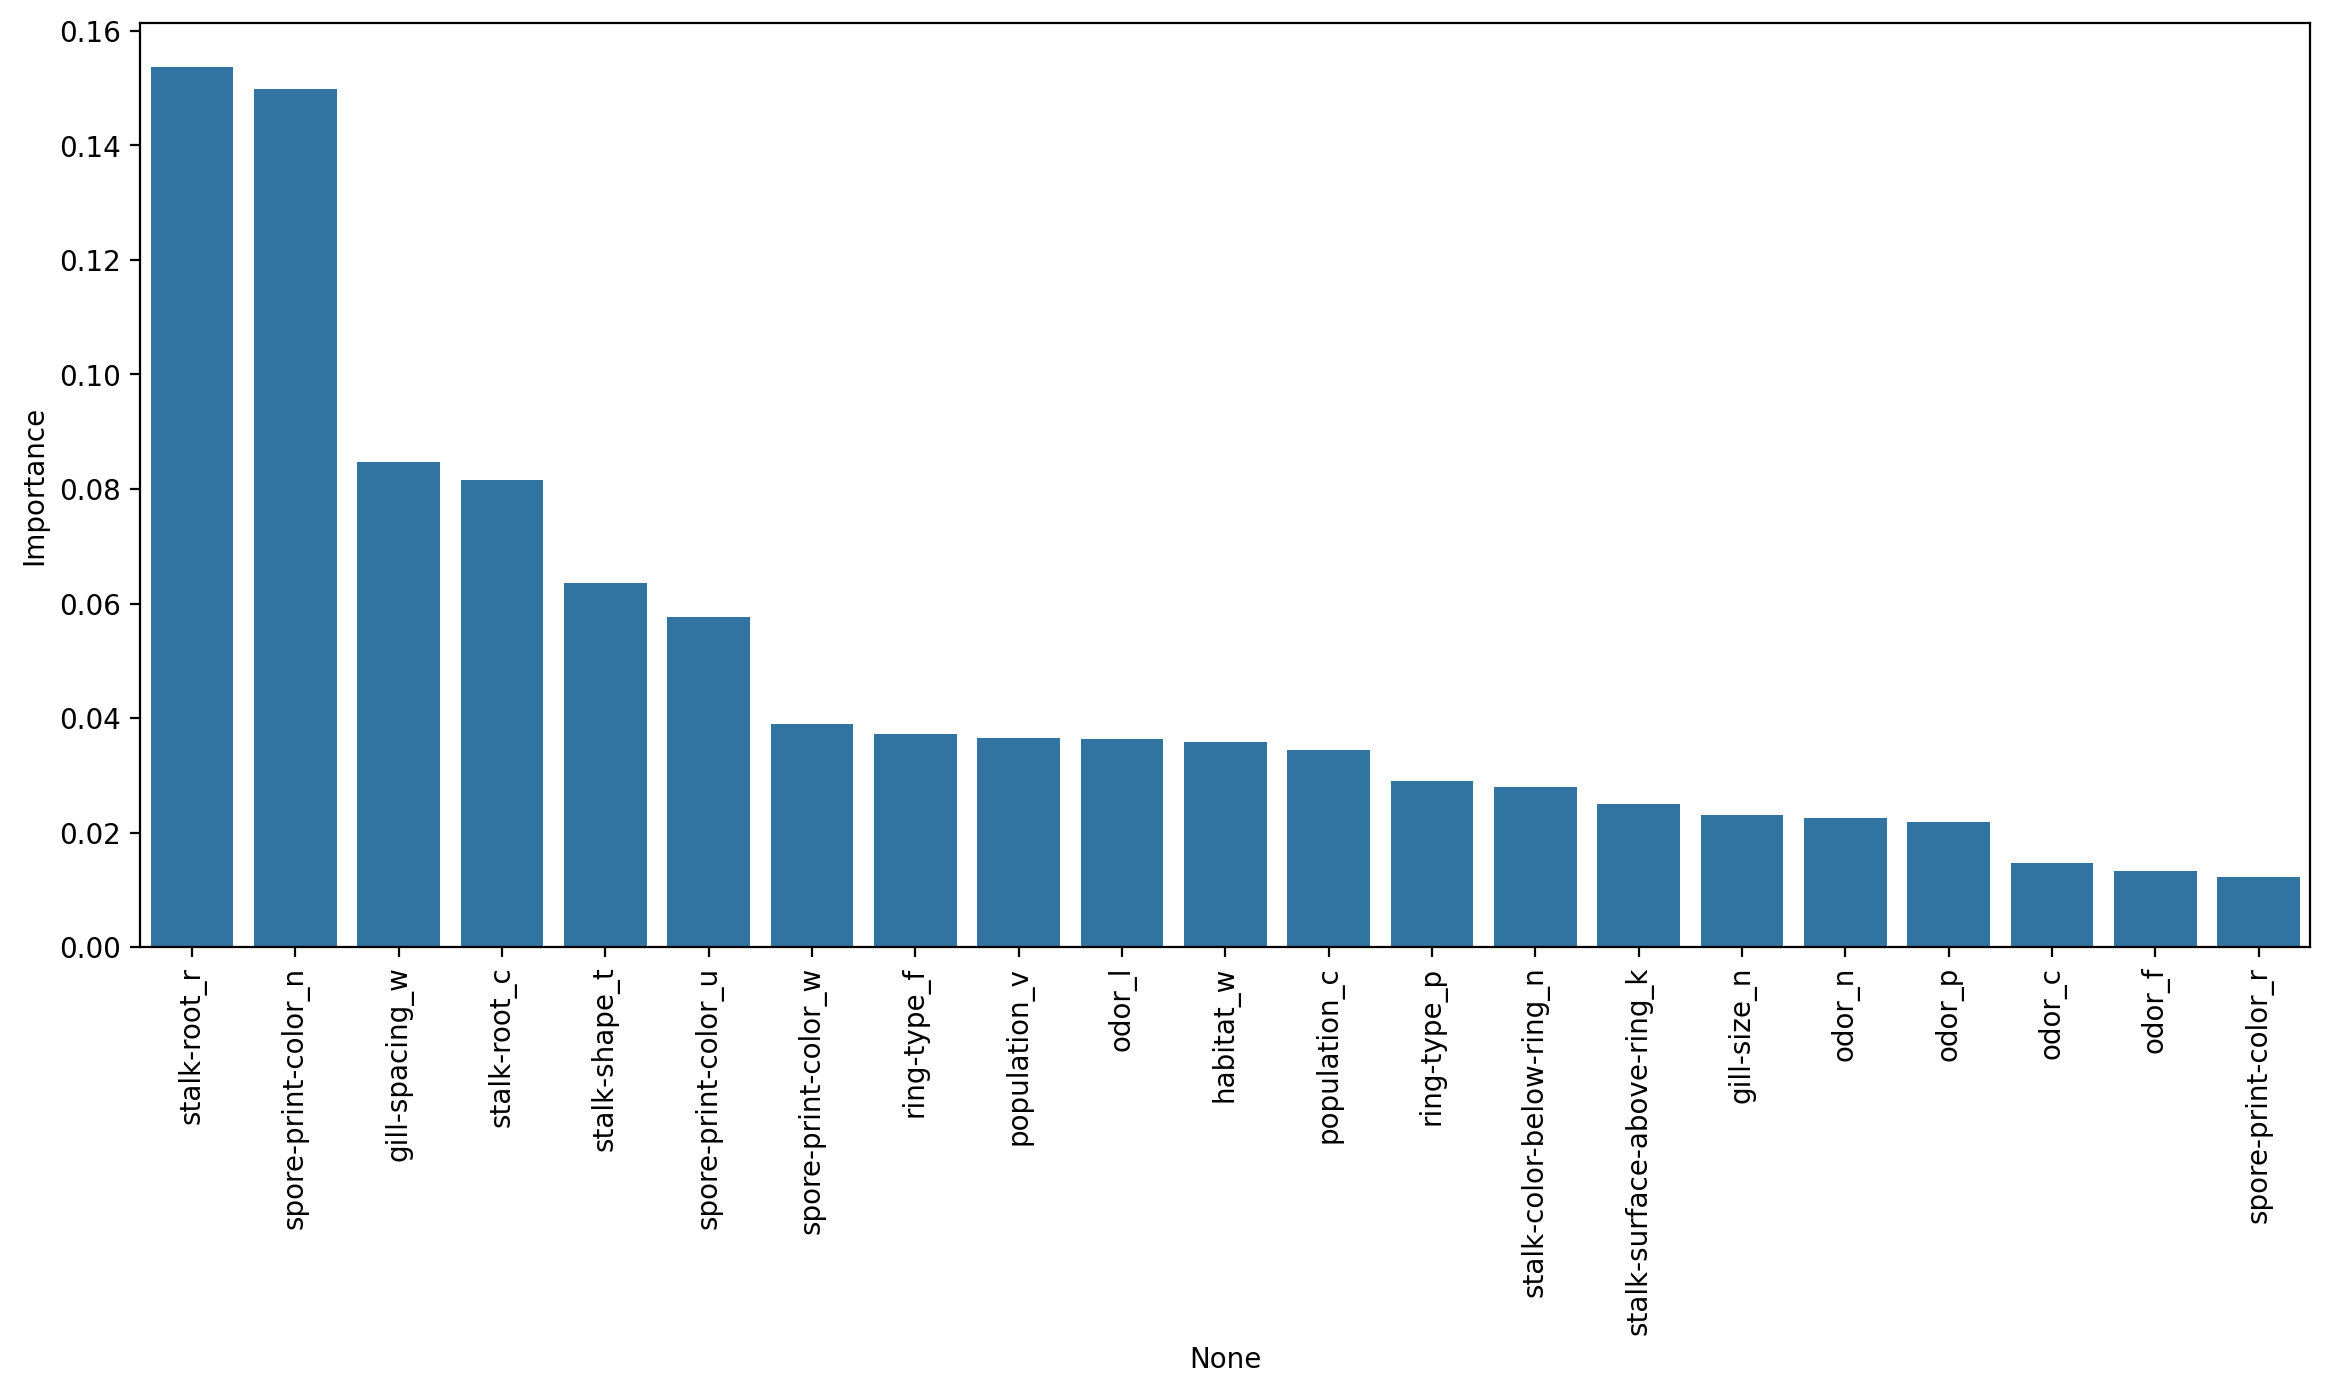

In [57]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

<Axes: xlabel='stalk-root', ylabel='count'>

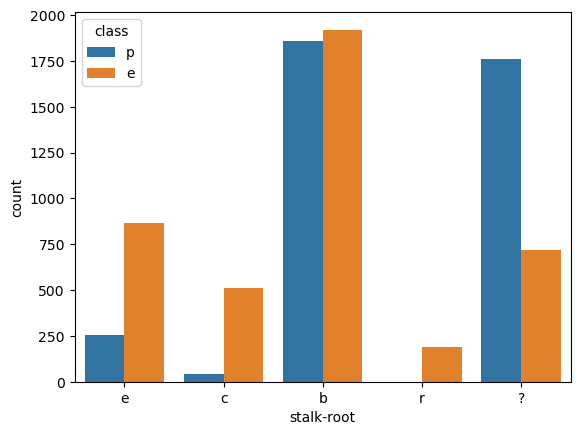

In [59]:
sns.countplot(data=df,x='stalk-root',hue='class')